In [1]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import argparse

Using TensorFlow backend.


In [2]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))


[INFO] loading CIFAR-10 data...
170500096/170498071 [==============================] - 65s 0us/step


[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 37s 734us/step - loss: 1.8420 - acc: 0.3427 - val_loss: 1.7214 - val_acc: 0.3852
Epoch 2/100
50000/50000 [==============================] - 39s 775us/step - loss: 1.6526 - acc: 0.4147 - val_loss: 1.7163 - val_acc: 0.3900
Epoch 3/100
50000/50000 [==============================] - 37s 747us/step - loss: 1.5724 - acc: 0.4458 - val_loss: 1.5555 - val_acc: 0.4452
Epoch 4/100
50000/50000 [==============================] - 39s 780us/step - loss: 1.5136 - acc: 0.4667 - val_loss: 1.5142 - val_acc: 0.4632
Epoch 5/100
50000/50000 [==============================] - 39s 774us/step - loss: 1.4652 - acc: 0.4831 - val_loss: 1.5554 - val_acc: 0.4527
Epoch 6/100
50000/50000 [==============================] - 38s 765us/step - loss: 1.4228 - acc: 0.4998 - val_loss: 1.5276 - val_acc: 0.4594
Epoch 7/100
50000/50000 [==============================] - 36s 721us/step - loss: 1

NameError: name 'args' is not defined

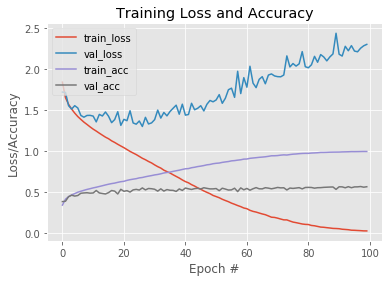

In [3]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"]

# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
    metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
    epochs=100, batch_size=32)

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names=labelNames))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("keras_cifar10")
